<a href="https://colab.research.google.com/github/TranTan1410/tuan12/blob/main/b%C3%A0i_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/btvn2/HINH_ANH1/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 120 images belonging to 3 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/btvn2/HINH_ANH1/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 44 images belonging to 3 classes.


In [ ]:
training_data.class_indices

{'dat': 0, 'dung': 1, 'tan': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_data,epochs=100,batch_size=64,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])


Epoch 1/100
4/4 [==============================] - 46s 11s/step - loss: 10.4382 - accuracy: 0.3333 - val_loss: 1.0484 - val_accuracy: 0.3864
Epoch 2/100
4/4 [==============================] - 1s 315ms/step - loss: 1.1020 - accuracy: 0.3917 - val_loss: 0.9650 - val_accuracy: 0.6136
Epoch 3/100
4/4 [==============================] - 1s 322ms/step - loss: 0.9814 - accuracy: 0.5500 - val_loss: 0.8669 - val_accuracy: 0.8864
Epoch 4/100
4/4 [==============================] - 1s 317ms/step - loss: 0.7286 - accuracy: 0.8583 - val_loss: 0.5499 - val_accuracy: 0.8409
Epoch 5/100
4/4 [==============================] - 1s 324ms/step - loss: 0.4405 - accuracy: 0.8167 - val_loss: 0.1430 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 1s 325ms/step - loss: 0.2084 - accuracy: 0.9500 - val_loss: 0.0898 - val_accuracy: 0.9773
Epoch 7/100
4/4 [==============================] - 1s 328ms/step - loss: 0.1406 - accuracy: 0.9417 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 8/100
4

<function matplotlib.pyplot.show>

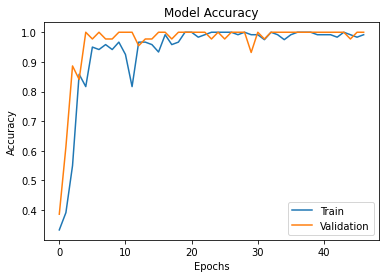

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show


dat


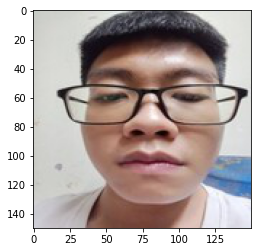

In [ ]:
model.save("Nhan_dien_nguoi.h5")
model_nhandien=load_model('Nhan_dien_nguoi.h5')
img=load_img("/content/drive/MyDrive/btvn2/HINH_ANH1/test/dat.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='dat'
if round(result[0][1])==1:
  prediction='dung'
if round(result[0][2])==1:
  prediction='Tan'
print(prediction)


dung


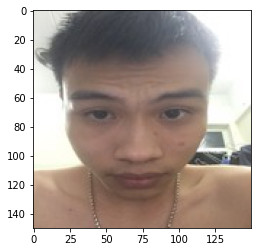

In [ ]:
img=load_img("/content/drive/MyDrive/btvn2/HINH_ANH1/test/dung.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='dat'
if round(result[0][1])==1:
  prediction='dung'
if round(result[0][2])==1:
  prediction='Tan'
print(prediction)


Tan


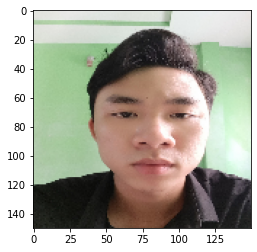

In [ ]:
img=load_img("/content/drive/MyDrive/btvn2/HINH_ANH1/test/tan.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='dat'
if round(result[0][1])==1:
  prediction='dung'
if round(result[0][2])==1:
  prediction='Tan'
print(prediction)
